In [1]:
from myutility import *
from mygeom import circles
%matplotlib inline
plt.style.use('classic')
plt.rc("figure",facecolor="w",figsize=(6,4))
plt.rc("font",size=10)
plt.rc("savefig",dpi=300)

Welcome to JupyROOT 6.10/00


In [2]:
DatasetFolder = '/Volumes/MULTIMEDIA/HGCal/Ntuple/'
DatasetFile   = 'CMSSW930_partGun_PDGid22_x1000_E30.0To30.0_NTUP'

df            = read_root(DatasetFolder+DatasetFile+".root",'ana/hgc')
#df_rerun      = pd.read_pickle("rerun/"+DatasetFile+".plk")
#Need this to rerun reconstruction offline 
df_rerun      = RerunReco(HGCalNtuple(DatasetFolder+DatasetFile+".root"))
df_rerun.to_pickle("rerun/"+DatasetFile+".plk")

######################################################
#df_cmsswrhit = pd.read_csv("csv/"+DatasetFile+".csv")

In [1]:
%qtconsole --style monokai

## 1. Multiclusters

In [6]:
multreco,multrerun = MakeMultArray(df, df_rerun,1)
Ediff,Ereco,Ererun = CalMultEnergy(multreco,multrerun,1)

(-150, 150)

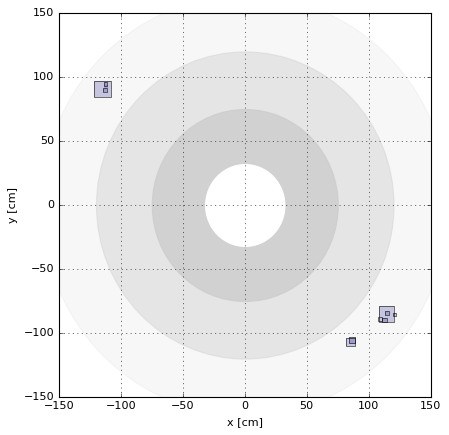

In [7]:
#multreco1 = multreco[multreco[:,4]<10]
plt.figure(figsize=(6,6))

circles(0, 0, 164, 'None', alpha=0.1, lw=1, edgecolor='None',color="0.7")
circles(0, 0, 120, 'None', alpha=0.4, lw=1, edgecolor='None',color="0.8")
circles(0, 0, 75, 'None', alpha=0.8, lw=1, edgecolor='None',color='0.8')
circles(0, 0, 32, 'None', alpha=1, lw=1, edgecolor='None',color="w") 

plt.scatter(multreco[:,1],multreco[:,2], label="CMSSW921",
            marker="s",c=multreco[:,4],edgecolor="w",linewidth=0.3,
            s=40*multreco[:,0]**0.5,alpha = 0.2)


plt.scatter(multrerun[:,1],multrerun[:,2],label="Offline",
            marker="s",c="None",edgecolor="k",linewidth=0.5,
            s=40*multrerun[:,0]**0.5, alpha =1)
    

plt.xlabel("x [cm]")
plt.ylabel("y [cm]")
plt.grid(True)
#plt.legend()
plt.xlim([-150,150])
plt.ylim([-150,150])
#plt.savefig("plot/Reco_rerun.pdf")
#plt.savefig("plot_photon/Reco_rerun_22x10change.png",dpi=400)

In [36]:
imult = 7
eventnumber =0

cllist = [i for i in df.multiclus_cluster2d[eventnumber][df.multiclus_z[eventnumber]>0]][imult-1]
y = df.cluster2d_y[eventnumber][cllist]
z = df.cluster2d_z[eventnumber][cllist]

rmultlist = [i for i in multiClustersList_rerun if i.z>0]
rcllist = [ i for i in rmultlist[imult-1].thisCluster]
ry = [i.y for i in rcllist]
rz = [i.z for i in rcllist]


plt.figure(figsize=(12,4))

plt.scatter(multreco[:,3],multreco[:,2], #label="Multiclus_CMSSW930",
            marker="*",c="b",edgecolor="w",linewidth=0.3,
            s=1000*multreco[:,0]**0.5,alpha = 0.3)

plt.scatter(multrerun[:,3],multrerun[:,2],#label="Multiclus_Offline",
            marker="*",c="None",edgecolor="k",linewidth=0.5,
            s=1000*multrerun[:,0]**0.5, alpha =1)

plt.scatter(multreco[imult,3],multreco[imult,2],
            marker="*",c="pink",edgecolor="w",linewidth=0.3,
            s=1000*multreco[imult,0]**0.5,alpha = 1)

plt.scatter(multrerun[imult,3],multrerun[imult,2],
            marker="*",c="None",edgecolor="k",linewidth=2,
            s=1000*multrerun[imult,0]**0.5, alpha =1)

plt.scatter(z,y,marker="s",s=100,edgecolor="None",c="deepskyblue",alpha=0.5,label="2DCluster_CMSSW930")
plt.scatter(rz,ry,marker="s",s=100,edgecolor="k",c="None",alpha=1,label="2DCluster_Offline")



#########################layercluster####################
select = df_rerun.reclusters2D_z[eventnumber]>0
plt.scatter(df_rerun.reclusters2D_z[eventnumber][select],
            df_rerun.reclusters2D_y[eventnumber][select],
            marker=".",c="k",edgecolor="None",linewidth=0.8,
            s=10, alpha =1)

plotEElayer()
plotFHlayer()


plt.legend()
plt.xlim([315,355])
plt.ylim([-130,-40])
plt.xlabel("z [cm]")
plt.ylabel("y [cm]")
plt.savefig("plot/multicluster{}.png".format(imult))

IndexError: list index out of range

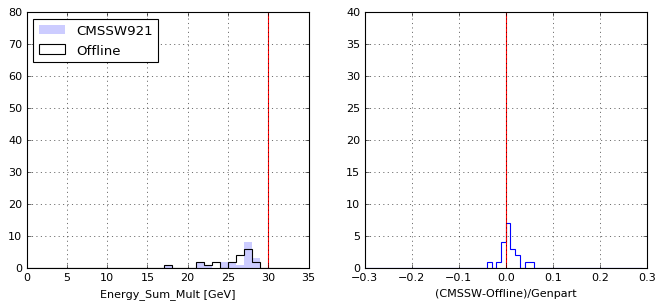

In [5]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)

hist(Ereco,bins=arange(0,35,1),histtype='stepfilled',lw=0,
     alpha=0.2,label='CMSSW921')
hist(Ererun,bins=arange(0,35,1),
     histtype='step',lw=1, color='k',label='Offline')
plt.axvline(x=30,color='r')
plt.xlabel("Energy_Sum_Mult [GeV]")
#plt.xlabel("y [cm]")
plt.grid(True)
plt.legend(loc='upper left')
#plt.xlim([-150,150])
plt.ylim([0,80])



plt.subplot(1,2,2)
hist(Ediff/30, bins=arange(-.3,.3,.01),histtype='step')
plt.axvline(x=0,color='r')
plt.xlabel("(CMSSW-Offline)/Genpart")
#plt.xlabel("y [cm]")
plt.grid(True)

#plt.xlim([-150,150])
plt.ylim([0,40])

plt.savefig("plot_photon/Energy211.png",dpi=400)

## 2. cluster2d

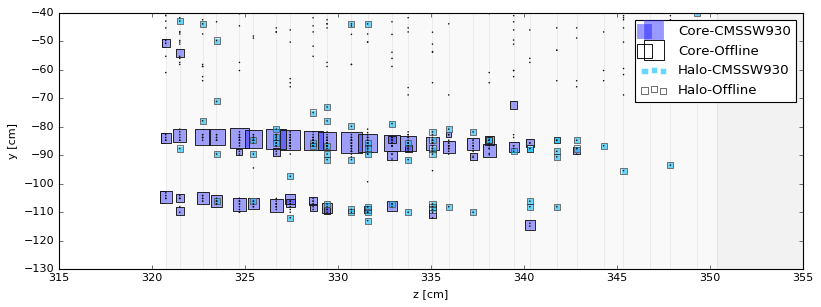

In [36]:
eventnumber = 0

plt.figure(figsize=(12,4))
plt.axvspan(320.75, 350.40, alpha=0.1, color="0.8",linewidth=0)
plt.axvspan(350.40, 410, alpha=0.1, color='0.5',linewidth=0)
plt.axvspan(410, 500, alpha=0.1, color='0.1',linewidth=0)

############## Plot layerCluster ###########
# Core
select = (df.cluster2d_z[eventnumber]>0) #& (df.cluster2d_energy[eventnumber]>0)
plt.scatter(df.cluster2d_z[eventnumber][select],
            df.cluster2d_y[eventnumber][select],
            label="Core-CMSSW930",marker="s",c="b",edgecolor="w",linewidth=0.3,
            s=200*df.cluster2d_energy[eventnumber][select]**0.5,alpha = 0.4)

select = df_rerun.reclusters2D_z[eventnumber]>0
plt.scatter(df_rerun.reclusters2D_z[eventnumber][select],
            df_rerun.reclusters2D_y[eventnumber][select],
            label="Core-Offline", marker="s",c="None",edgecolor="k",linewidth=0.8,
            s=200*df_rerun.reclusters2D_energy[eventnumber][select]**0.5, alpha =1)

# Halo
select = (df.cluster2d_z[eventnumber]>0) & (df.cluster2d_energy[eventnumber]==0)
plt.scatter(df.cluster2d_z[eventnumber][select],
            df.cluster2d_y[eventnumber][select],
            label="Halo-CMSSW930",marker="s",c="deepskyblue",edgecolor="w",linewidth=0.8,
            s=30,alpha = 0.6)


select = (df_rerun.reclusters2D_z[eventnumber]>0) & (df_rerun.reclusters2D_energy[eventnumber]==0)
plt.scatter(df_rerun.reclusters2D_z[eventnumber][select],
            df_rerun.reclusters2D_y[eventnumber][select],
            label="Halo-Offline", marker="s",c="None",edgecolor="k",linewidth=0.5,
            s=30,alpha = 1)

############## Plot hits ###########



# rechit Offline
select = df_rerun.rechit_z[eventnumber]>0
plt.scatter(df_rerun.rechit_z[eventnumber][select],
               df_rerun.rechit_y[eventnumber][select],
                marker="o",c="k",edgecolor="None",linewidth=0.5,
               s=2, alpha =1)
plt.legend()


plotEElayer()
plotFHlayer()

#plt.grid(True)
plt.xlim([315,355])
plt.ylim([-130,-40])
plt.xlabel("z [cm]")
plt.ylabel("y [cm]")

plt.savefig("plot_photon/pion_cluster2d.png",dpi=400)
#plt.close()

[ 1.04551196  0.28200629  0.          0.          0.          0.        ]
[ 1.04551191  0.          0.28200629  0.          0.          0.        ]
[ 2.39906716  0.54518723  0.02229077]
[ 2.39906723  0.54518721  0.02229077]
[ 1.5314132   0.24060917  0.          0.          0.        ]
[ 1.53141316  0.24060916  0.          0.          0.        ]
[ 2.49347496  0.46033245  0.04570544  0.          0.          0.        ]
[ 2.49347507  0.46033245  0.04570544  0.          0.          0.        ]
[ 2.50639987  0.08953771  0.18663643  0.          0.        ]
[ 2.50639999  0.18663644  0.          0.08953771  0.        ]
[ 2.22842097  0.04195909  0.07211719  0.          0.          0.        ]
[ 2.22842103  0.07211719  0.          0.          0.          0.04195909]
[ 1.95839834  0.13696837  0.          0.          0.          0.
  0.02889014  0.          0.        ]
[ 1.95839829  0.13696837  0.          0.          0.02889014  0.          0.
  0.          0.        ]
[ 2.78739119  0.          

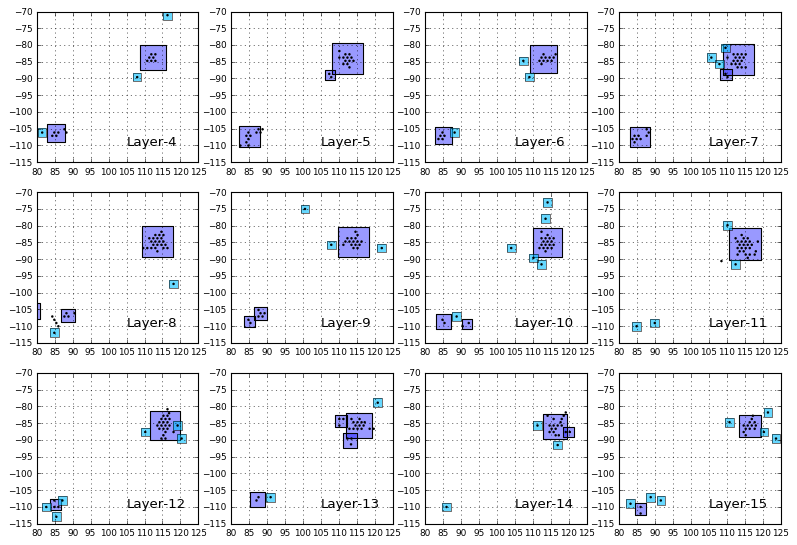

In [33]:
plt.figure(figsize=(12,8))
layernumberlist = arange(4,16)#[9,3,5,7,9,11,13,15,17,19,21,23]
#layernumberlist = [14,16,18,20,29,31,33,35,37,39,41,43]
for i in range(12):
    #print("layer{}".format(i))
    layernumber = layernumberlist[i]
    plt.subplot(3,4,i+1)
    ############## Plot layerCluster ###########
    # core layercluster
    select  = (df.cluster2d_z[eventnumber]>0) & (df.cluster2d_layer[eventnumber]==layernumber)
    layerz  = df.cluster2d_z[eventnumber][select].mean()
    plt.scatter(df.cluster2d_x[eventnumber][select],
                df.cluster2d_y[eventnumber][select],
                label="CMSSW921",marker="s",color="b",edgecolor="w",linewidth=0.3,
                s=500*df.cluster2d_energy[eventnumber][select]**0.5,alpha = 0.4)
    print(df.cluster2d_energy[eventnumber][select])
    
    select = abs(df_rerun.reclusters2D_z[eventnumber]-layerz)<0.1
    plt.scatter(df_rerun.reclusters2D_x[eventnumber][select],
                df_rerun.reclusters2D_y[eventnumber][select],
                label="Offline", marker="s",c="None",edgecolor="k",linewidth=1,
                s=500*df_rerun.reclusters2D_energy[eventnumber][select]**0.5, alpha =1)
    print(df_rerun.reclusters2D_energy[eventnumber][select])
    
    # Halo layercluster
    select = (df.cluster2d_z[eventnumber]>0) & (df.cluster2d_energy[eventnumber]==0)& (df.cluster2d_layer[eventnumber]==layernumber)
    plt.scatter(df.cluster2d_x[eventnumber][select],
                df.cluster2d_y[eventnumber][select],
                label="CMSSW930",marker="s",c="deepskyblue",edgecolor="None",linewidth=0.8,
                s=60,alpha = 0.6)


    select = (df_rerun.reclusters2D_z[eventnumber]>0) & (df_rerun.reclusters2D_energy[eventnumber]==0) & (abs(df_rerun.reclusters2D_z[eventnumber]-layerz)<0.1)
    plt.scatter(df_rerun.reclusters2D_x[eventnumber][select],
                df_rerun.reclusters2D_y[eventnumber][select],
                label="Offline", marker="s",c="None",edgecolor="k",linewidth=0.5,
                s=60,alpha = 1)
    
    ############## Plot hits ###########
    # rechit Offline
    select = abs(df_rerun.rechit_z[eventnumber]-layerz) < 0.1
    plt.scatter(df_rerun.rechit_x[eventnumber][select],
                df_rerun.rechit_y[eventnumber][select],
                marker="h",c="k",edgecolor="None",linewidth=1,
                s=6, alpha = 1)
    
    
    plt.yticks(fontsize=8)
    plt.xticks(fontsize=8)
    plt.text(105,-110 , "Layer-"+str(layernumber), fontsize=12)
    plt.xlim([80,125])
    plt.ylim([-115,-70])
    grid(True)


plt.savefig("plot_photon/photon_cluster2d_layer2.png",dpi=400)

# 3. Rechit

In [27]:
# rawhit
slt_rawhit = df.rechit_z[eventnumber]>0
rawhit_x = df.rechit_x[eventnumber][slt_rawhit]
rawhit_y = df.rechit_y[eventnumber][slt_rawhit]
rawhit_z = df.rechit_z[eventnumber][slt_rawhit]
rawhit_e = df.rechit_energy[eventnumber][slt_rawhit]
rawhit_r = (rawhit_x**2+rawhit_y**2)**0.5
# rechitCMSSW
#rechitCMSSW_x,rechitCMSSW_y,rechitCMSSW_z,rechitCMSSW_e = rechitcleaned_CMSSW(df_cmsswrhit,eventnumber)
#rechitCMSSW_r = (rechitCMSSW_x**2+rechitCMSSW_y**2)**0.5
slt_rechitCMSSW = (df.rechit_z[eventnumber]>0) &  (df.rechit_cluster2d[eventnumber]>-1)#(df.rechit_flags[eventnumber]<4) #(df.rechit_isHalf[eventnumber]==True) #& (df.rechit_cluster2d[eventnumber]>-1)
rechitCMSSW_x = df.rechit_x[eventnumber][slt_rechitCMSSW]
rechitCMSSW_y = df.rechit_y[eventnumber][slt_rechitCMSSW]
rechitCMSSW_z = df.rechit_z[eventnumber][slt_rechitCMSSW]
rechitCMSSW_e = df.rechit_energy[eventnumber][slt_rechitCMSSW]
rechitCMSSW_r = (rechitCMSSW_x**2+rechitCMSSW_y**2)**0.5


# rechitOffline
slt_rechitOffline = df_rerun.rechit_z[eventnumber]>0
rechitOffline_x = df_rerun.rechit_x[eventnumber][slt_rechitOffline]
rechitOffline_y = df_rerun.rechit_y[eventnumber][slt_rechitOffline]
rechitOffline_z = df_rerun.rechit_z[eventnumber][slt_rechitOffline]
rechitOffline_e = df_rerun.rechit_energy[eventnumber][slt_rechitOffline]
rechitOffline_r = (rechitOffline_x**2+rechitOffline_y**2)**0.5

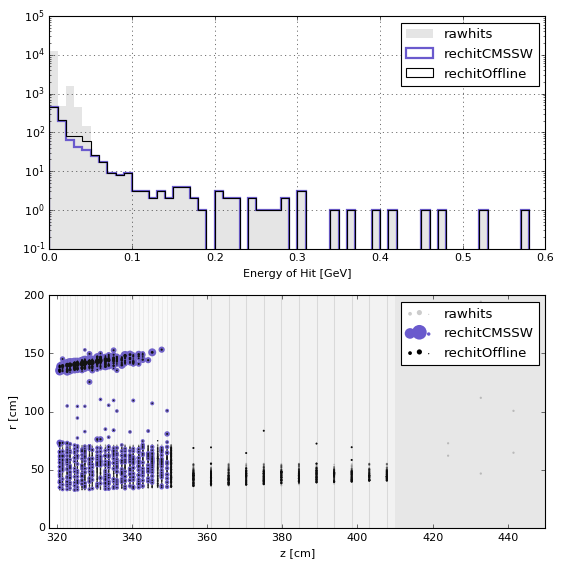

In [28]:
plt.figure(figsize=(8,8))
bins = arange(0,.6,0.01)
plt.clf()
plt.subplot(2,1,1)
plt.hist(rawhit_e,bins,histtype='stepfilled',lw=0,color="gray",alpha=0.2,label='rawhits')
plt.hist(rechitCMSSW_e,bins,histtype='step',lw=2,color="slateblue",alpha=1,label='rechitCMSSW')
plt.hist(rechitOffline_e,bins,histtype='step',lw=1,color="k",alpha=1,label='rechitOffline')
plt.yscale('log', nonposy='clip')
plt.xlabel("Energy of Hit [GeV]")
plt.legend()
plt.ylim([0.1,1e5])
plt.grid(True)

plt.subplot(2,1,2)
plt.axvspan(320.75, 350.40, alpha=0.1, color="0.8",linewidth=0)
plt.axvspan(350.40, 410, alpha=0.1, color='0.5',linewidth=0)
plt.axvspan(410, 500, alpha=0.1, color='0.1',linewidth=0)

plt.scatter(rawhit_z,rawhit_r,marker="o",c="k",edgecolor="None",linewidth=1,
            s=20*rawhit_e**0.5, alpha =0.2,label='rawhits')
plt.scatter(rechitCMSSW_z,rechitCMSSW_r,marker="o",c="slateblue",edgecolor="None",linewidth=1,
            s=160*rechitCMSSW_e**0.5, alpha =1,label='rechitCMSSW')
plt.scatter(rechitOffline_z,rechitOffline_r,marker="o",c="k",edgecolor="None",linewidth=1,
            s=20*rechitOffline_e**0.5, alpha =1,label='rechitOffline')
plt.legend()
plt.ylim([0,200])
plt.xlim([318,450])
plt.xlabel("z [cm]")
plt.ylabel("r [cm]")

plotEElayer()
plotFHlayer()
plt.savefig("plot_photon/hits_layer3.png",dpi=400)

In [25]:
ievent = 0
ilayer = 4
icluster = 2

selector = (df.cluster2d_z[ievent]>0)&(df.cluster2d_layer[ievent]==ilayer)
clusterx = df.cluster2d_x[ievent][selector][icluster]
clustery = df.cluster2d_y[ievent][selector][icluster]
clusterz = df.cluster2d_z[ievent][selector][icluster]
clustere = df.cluster2d_energy[ievent][selector][icluster]

index_rhit = df.cluster2d_rechits[ievent][selector][icluster]
rhitx = df.rechit_x[ievent][index_rhit]
rhity = df.rechit_y[ievent][index_rhit]
rhitz = df.rechit_z[ievent][index_rhit]
rhite = df.rechit_energy[ievent][index_rhit]



# get cleaned rechit on a layer
selector = (df.rechit_z[ievent]>0)&(df.rechit_layer[ievent]==ilayer)&(df.rechit_cluster2d[ievent]>-1)
        
clnrhitx = df.rechit_x[ievent][selector]
clnrhity = df.rechit_y[ievent][selector]
clnrhitz = df.rechit_z[ievent][selector]
clnrhite = df.rechit_energy[ievent][selector]

#temp = df_cmsswrhit[(df_cmsswrhit.evn==df.event[ievent])&
#                    (df_cmsswrhit.layer==ilayer)&
#                    (df_cmsswrhit.z>0)
#                   ]
#clnrhitx = temp.x
#clnrhity = temp.y
#clnrhitz = temp.z
#clnrhite = temp.energy

# get all rawhit on a layer
selector = (df.rechit_z[ievent]>0)&(df.rechit_layer[ievent]==ilayer)
rawhitx = df.rechit_x[ievent][selector]
rawhity = df.rechit_y[ievent][selector]
rawhitz = df.rechit_z[ievent][selector]
rawhite = df.rechit_energy[ievent][selector]

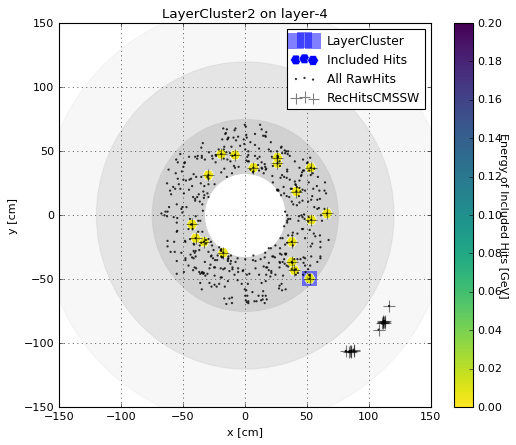

In [26]:
plt.figure(figsize=(7.5,6))
circles(0, 0, 164, 'None', alpha=0.1, lw=1, edgecolor='None',color="0.7")
circles(0, 0, 120, 'None', alpha=0.4, lw=1, edgecolor='None',color="0.8")
circles(0, 0, 75, 'None', alpha=0.8, lw=1, edgecolor='None',color='0.8')
circles(0, 0, 32, 'None', alpha=1, lw=1, edgecolor='None',color="w")


plt.scatter(clusterx,clustery,marker="s",c="b",edgecolor="None",linewidth=0,
            s=200, alpha =0.5,label='LayerCluster')
plt.scatter(rhitx,rhity,marker="H",c=rhite,cmap="viridis_r",vmax=0.2,vmin=-0.0,edgecolor="w",linewidth=0.5,
            s=100, alpha =1,label='Included Hits')
cbar = plt.colorbar()
cbar.set_label("Energy of Included Hits [GeV]", rotation=270)

plt.scatter(rawhitx,rawhity,marker="H",c="k",edgecolor="None",linewidth=0,
            s=5, alpha =0.8,label='All RawHits')
plt.scatter(clnrhitx,clnrhity,marker="+",c="k",edgecolor="None",linewidth=1,
            s=100, alpha=0.5,label='RecHitsCMSSW')





plt.grid(True)

plt.legend(fontsize=11)
plt.ylim([-150,150])
plt.xlim([-150,150])
plt.xlabel("x [cm]")
plt.ylabel("y [cm]")
plt.title("LayerCluster"+str(icluster)+ " on layer-"+str(ilayer))
plt.savefig(str(icluster)+"shifted"+str(ilayer)+".png",dpi=400)


In [27]:
for i in range(500):#rechitCMSSW_z.size):
    tempx = rechitCMSSW_x[i]
    tempy = rechitCMSSW_y[i]
    tempz = rechitCMSSW_z[i]
    boxOffline = [(abs(rechitOffline_x - tempx)<0.1)&
                  (abs(rechitOffline_y - tempy)<0.1)&
                  (abs(rechitOffline_z - tempz)<0.1)]
    boxRawhit  = [(abs(rawhit_x - tempx)<0.1)&
                  (abs(rawhit_y - tempy)<0.1)&
                  (abs(rawhit_z - tempz)<0.1)]
    print("------------------------------")
    print("hit #{}".format(i))
    print("Energy of Rawhit:       {0:4f}GeV".format(rawhit_e[boxRawhit][0]))
    print("Energy of RechitCMSSW:  {0:4f}GeV".format(rechitCMSSW_e[i]))
    print("Energy of RechitOffline:{0:4f}GeV".format(rechitOffline_e[boxOffline][0]))


NameError: name 'rechitCMSSW_x' is not defined

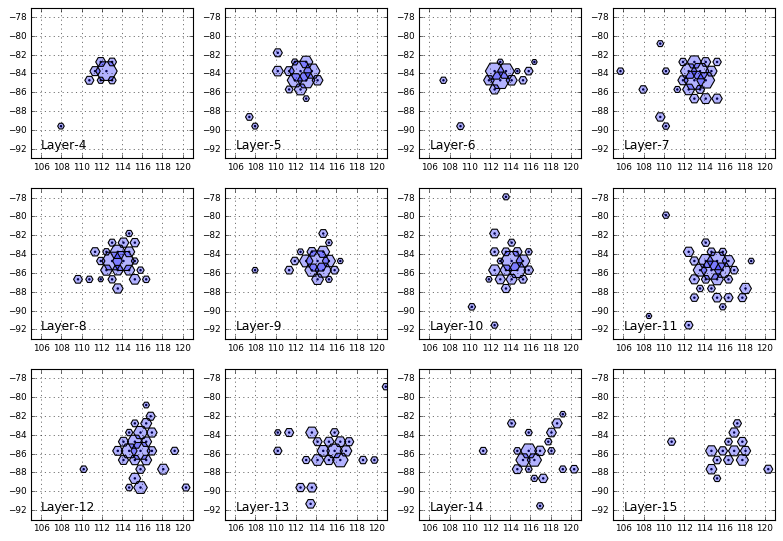

In [49]:
plt.figure(figsize=(12,8))
layernumberlist = arange(4,16)#[9,3,5,7,9,11,13,15,17,19,21,23]
#layernumberlist = [14,16,18,20,29,31,33,35,37,39,41,43]
for i in range(12):
    layernumber = layernumberlist[i]
    plt.subplot(3,4,i+1)
    
    ############## Plot hits ###########
    # rawhit
    select2rch = (df.rechit_z[eventnumber]>0) & (df.rechit_layer[eventnumber]==layernumber)
    layerz = df.rechit_z[eventnumber][select2rch].mean()
    plt.scatter(df.rechit_x[eventnumber][select2rch],
                df.rechit_y[eventnumber][select2rch],
                marker="o",c="k",edgecolor="None",linewidth=0,
                s=5, alpha =1)
                #s=50*df.rechit_energy[eventnumber][select2rch]**0.5, alpha =1)
    # rechit CMSSW
    select2rch =(df.rechit_z[eventnumber]>0) & \
                (df.rechit_layer[eventnumber]==layernumber) & \
                (df.rechit_flags[eventnumber]<3)
                #(df.rechit_cluster2d[eventnumber]>-1)
                #
    plt.scatter(df.rechit_x[eventnumber][select2rch],
                df.rechit_y[eventnumber][select2rch],
                marker="H",c="b",edgecolor="None",linewidth=0,
                s=400*df.rechit_energy[eventnumber][select2rch]**0.5, alpha =0.3)
    
    #HitCMSSW_x,HitCMSSW_y,HitCMSSW_z,HitCMSSW_e = rechitcleaned_CMSSW(df_cmsswrhit,eventnumber,layernumber)
    #plt.scatter(HitCMSSW_x,HitCMSSW_y,
    #           marker="H",c="b",edgecolor="None",linewidth=0,
    #           s=400*HitCMSSW_e**0.5, alpha =0.3)
    
    # rechit Offline
    select2rrch = abs(df_rerun.rechit_z[eventnumber]-layerz)<0.1
    plt.scatter(df_rerun.rechit_x[eventnumber][select2rrch],
               df_rerun.rechit_y[eventnumber][select2rrch],
                marker="H",c="None",edgecolor="k",linewidth=1,
               s=400*df_rerun.rechit_energy[eventnumber][select2rrch]**0.5, alpha =1)
    
    plt.yticks(fontsize=8)
    plt.xticks(fontsize=8)
    plt.text(106, -92, "Layer-"+str(layernumber), fontsize=11)
    plt.xlim([105,121])
    plt.ylim([-93,-77])
    plt.grid(True)
    
#plt.xlabel("x [cm]")
#plt.ylabel("y [cm]")

#plt.legend()

plt.savefig("plot_photon/rechit_layer.png",dpi=400)

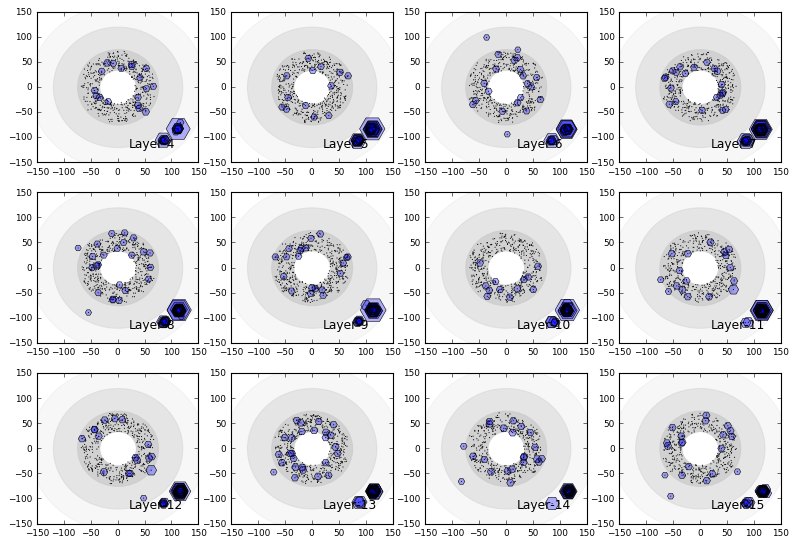

In [45]:
plt.figure(figsize=(12,8))
layernumberlist = arange(4,16)#[9,3,5,7,9,11,13,15,17,19,21,23]
#layernumberlist = [14,16,18,20,29,31,33,35,37,39,41,43]
for i in range(12):
    layernumber = layernumberlist[i]
    plt.subplot(3,4,i+1)
    circles(0, 0, 164, 'None', alpha=0.1, lw=1, edgecolor='None',color="0.7")
    circles(0, 0, 120, 'None', alpha=0.4, lw=1, edgecolor='None',color="0.8")
    circles(0, 0, 75, 'None', alpha=0.8, lw=1, edgecolor='None',color='0.8')
    circles(0, 0, 32, 'None', alpha=1, lw=1, edgecolor='None',color="w")



    
    ############## Plot hits ###########
    # rawhit
    select2rch = (df.rechit_z[eventnumber]>0) & (df.rechit_layer[eventnumber]==layernumber)
    layerz = df.rechit_z[eventnumber][select2rch].mean()
    plt.scatter(df.rechit_x[eventnumber][select2rch],
                df.rechit_y[eventnumber][select2rch],
                marker=".",c="k",edgecolor="None",linewidth=0,
                s=4, alpha =1)
                #s=50*df.rechit_energy[eventnumber][select2rch]**0.5, alpha =1)
    # rechit CMSSW
    select2rch =(df.rechit_z[eventnumber]>0) & \
                (df.rechit_layer[eventnumber]==layernumber) & \
                (df.rechit_flags[eventnumber]<3)
                #(df.rechit_cluster2d[eventnumber]>-1)
    plt.scatter(df.rechit_x[eventnumber][select2rch],
                df.rechit_y[eventnumber][select2rch],
                marker="H",c="b",edgecolor="None",linewidth=0,
                s=500*df.rechit_energy[eventnumber][select2rch]**0.5, alpha =0.3)
    
    #HitCMSSW_x,HitCMSSW_y,HitCMSSW_z,HitCMSSW_e = rechitcleaned_CMSSW(df_cmsswrhit,eventnumber,layernumber)
    #plt.scatter(HitCMSSW_x,HitCMSSW_y,
    #           marker="H",c="b",edgecolor="None",linewidth=0,
    #           s=400*HitCMSSW_e**0.5, alpha =0.3)
    
    # rechit Offline
    select2rrch = abs(df_rerun.rechit_z[eventnumber]-layerz)<0.1
    plt.scatter(df_rerun.rechit_x[eventnumber][select2rrch],
               df_rerun.rechit_y[eventnumber][select2rrch],
                marker="H",c="None",edgecolor="k",linewidth=0.5,
               s=500*df_rerun.rechit_energy[eventnumber][select2rrch]**0.5, alpha =1)
    
    plt.yticks(fontsize=8)
    plt.xticks(fontsize=8)
    plt.text(20, -120, "Layer-"+str(layernumber), fontsize=11)
    plt.xlim([-150,150])
    plt.ylim([-150,150])
    #plt.grid(True)
    
#plt.xlabel("x [cm]")
#plt.ylabel("y [cm]")

#plt.legend()

plt.savefig("plot_photon/rechit_layer_zoomout.png",dpi=400)

In [3]:
ntuple = HGCalNtuple(DatasetFolder+DatasetFile+".root")
#eventlist = [i for i in ntuple]

In [4]:
for event in ntuple:
    
    HGCalAlgo = HGCalImagingAlgo(ecut=ecut, deltac=deltac, multiclusterRadii=multiclusterRadii,
                                 minClusters=minClusters, dependSensor=dependSensor, verbosityLevel=0)
    clusters2D_rerun = HGCalAlgo.makeClusters(event.recHits())
    clusters2DList_rerun = HGCalAlgo.getClusters(clusters2D_rerun,verbosityLevel=0)
    multiClustersList_rerun = HGCalAlgo.make3DClusters(clusters2D_rerun)
    print(len(clusters2DList_rerun))
    break

185


In [11]:
multlist = [i for i in multiClustersList_rerun if i.z>0]
cllist = [ i for i in multlist[1].thisCluster]
ry = [i.y for i in cllist]
rz = [i.z for i in cllist]

# Backup functions

In [4]:
labels = ['remulticlus_energy', 'remulticlus_x', 'remulticlus_y', 'remulticlus_z', 'remulticlus_nclus',
          'reclusters2D_energy', 'reclusters2D_x', 'reclusters2D_y', 'reclusters2D_z', 'reclusters2D_nhexel',
          'rechit_energy','rechit_x','rechit_y','rechit_z'
          ]

mydtype = [(label, 'object') for label in labels]

def AppendEventData(FlatNtuple, multiClustersList_rerun, clusters2DList_rerun, rHitsCleaned):
    remulticlus_energy, remulticlus_x, remulticlus_y, remulticlus_z, remulticlus_nclus = [], [], [], [], []
    for i in range(len(multiClustersList_rerun)):
        remulticlus_energy.append(multiClustersList_rerun[i].energy)
        remulticlus_x.append(multiClustersList_rerun[i].x)
        remulticlus_y.append(multiClustersList_rerun[i].y)
        remulticlus_z.append(multiClustersList_rerun[i].z)
        remulticlus_nclus.append(len(multiClustersList_rerun[i].thisCluster))
    remulticlus_energy = array(remulticlus_energy)
    remulticlus_x = array(remulticlus_x)
    remulticlus_y = array(remulticlus_y)
    remulticlus_z = array(remulticlus_z)
    remulticlus_nclus = array(remulticlus_nclus)

    reclusters2D_energy, reclusters2D_x, reclusters2D_y, reclusters2D_z, reclusters2D_nhexel = [], [], [], [], []
    for i in range(len(clusters2DList_rerun)):
        reclusters2D_energy.append(clusters2DList_rerun[i].energy)
        reclusters2D_x.append(clusters2DList_rerun[i].x)
        reclusters2D_y.append(clusters2DList_rerun[i].y)
        reclusters2D_z.append(clusters2DList_rerun[i].z)
        reclusters2D_nhexel.append(len(clusters2DList_rerun[i].thisCluster))
    reclusters2D_energy = array(reclusters2D_energy)
    reclusters2D_x = array(reclusters2D_x)
    reclusters2D_y = array(reclusters2D_y)
    reclusters2D_z = array(reclusters2D_z)
    reclusters2D_nhexel = array(reclusters2D_nhexel)
    
    rerechit_energy, rerechit_x, rerechit_y, rerechit_z = [], [], [], []
    for i in range(len(rHitsCleaned)):
        rerechit_energy.append(rHitsCleaned[i].energy())
        rerechit_x.append(rHitsCleaned[i].x())
        rerechit_y.append(rHitsCleaned[i].y())
        rerechit_z.append(rHitsCleaned[i].z())   
    rerechit_energy = array(rerechit_energy)
    rerechit_x = array(rerechit_x)
    rerechit_y = array(rerechit_y)
    rerechit_z = array(rerechit_z)

    row = [remulticlus_energy, remulticlus_x, remulticlus_y, remulticlus_z, remulticlus_nclus,
           reclusters2D_energy, reclusters2D_x, reclusters2D_y, reclusters2D_z, reclusters2D_nhexel,
           rerechit_energy,rerechit_x,rerechit_y,rerechit_z
           ]

    FlatNtuple.append(row)


def RerunReco(ntuple):
    FlatNtuple = []

    # start event loop
    for event in ntuple:
        if (not event.entry() in allowedRangeEvents): continue  # checking external condition
        if (verbosityLevel >= 1): print "\nCurrent event: ", event.entry()

        # get collections of raw rechits, sim clusters, 2D clusters, multi clusters, etc.
        recHitsRaw = event.recHits()
        simClusters = event.simClusters()
        layerClusters = event.layerClusters()
        multiClusters = event.multiClusters()

        # get flat list of rechist associated to sim-cluster hits
        rHitsSimAssoc = getRecHitsSimAssoc(recHitsRaw, simClusters)
        # get flat list of raw rechits which satisfy treshold condition
        rHitsCleaned = [rechit for rechit in recHitsRaw if recHitAboveTreshold(rechit, ecut, dependSensor)]

        ### Imaging algo run as stand-alone (python)
        # instantiate the stand-alone clustering implemented in HGCalImagingAlgo
        HGCalAlgo = HGCalImagingAlgo(ecut=ecut, deltac=deltac, multiclusterRadii=multiclusterRadii,
                                     minClusters=minClusters, dependSensor=dependSensor, verbosityLevel=0)
        # produce 2D clusters with stand-alone algo, out of all raw rechits
        clusters2D_rerun = HGCalAlgo.makeClusters(recHitsRaw)  # nested list of "hexels", per layer, per 2D cluster
        # produce multi-clusters with stand-alone algo, out of all 2D clusters
        multiClustersList_rerun = HGCalAlgo.make3DClusters(
            clusters2D_rerun)  # flat list of multi-clusters (as basic clusters)
        # get for testing: flat list of 2D clustered, and flat list of clustered non-halo "hexeles" (from stand-alone algo)
        clusters2DList_rerun = HGCalAlgo.getClusters(clusters2D_rerun,
                                                     verbosityLevel=0)  # flat list of 2D clusters (as basic clusters)
        hexelsClustered_rerun = [iNode for bClust in clusters2DList_rerun for iNode in bClust.thisCluster if
                                 not iNode.isHalo]  # flat list of clustered "hexeles", without the "halo" hexels

        AppendEventData(FlatNtuple,multiClustersList_rerun, clusters2DList_rerun,rHitsCleaned)

    FlatNtuple = pd.DataFrame.from_records(FlatNtuple, columns=labels)
    return FlatNtuple


def plotEElayer():
    EElayerz = np.array([320.75,321.50,322.73,323.48,324.71,325.46,326.69,327.44,328.67,\
    329.42,330.73,331.60,332.91,333.78,335.09,335.96,337.27,338.14,339.45,340.32,\
    341.77, 342.84,344.29,345.36,346.81,347.88,349.33,350.40])
    for i in range(EElayerz.size):
        plt.axvline(x=EElayerz[i],color='k',linewidth=0.5,alpha=0.1)
        
def plotFHlayer(): 
    BHlayerz = np.array([356.33,361.01,365.69,370.37,375.05,379.73,384.41,389.09,393.77,398.45,403.13,407.81])
    for i in range(BHlayerz.size):
            plt.axvline(x=BHlayerz[i],color='k',linewidth=1,alpha=0.1) 

In [7]:
def rechitcleaned_CMSSW(df_cmsswrhit,eventnumber,layernumber=None):
    if layernumber is None:
        select2rch = (df_cmsswrhit.evn==df.event[eventnumber]) &  (df_cmsswrhit.z >0)
    else:
        select2rch = (df_cmsswrhit.evn==df.event[eventnumber]) & (df_cmsswrhit.layer==layernumber) & (df_cmsswrhit.z >0)
    
    HitCMSSW_x = array(df_cmsswrhit[select2rch].x)
    HitCMSSW_y = array(df_cmsswrhit[select2rch].y)
    HitCMSSW_z = array(df_cmsswrhit[select2rch].z)
    HitCMSSW_e = array(df_cmsswrhit[select2rch].energy)
    
    return HitCMSSW_x,HitCMSSW_y,HitCMSSW_z,HitCMSSW_e


In [8]:
df_cmsswrhit.x.size

1053273

In [23]:
flag[0:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 2], dtype=int32)